In [1]:
from cyclum import tuning

Using TensorFlow backend.


In [2]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as mse

import numpy as np
import matplotlib.pyplot as plt

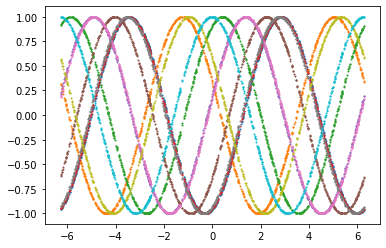

In [3]:
seed = 3
np.random.seed(seed)

cell_time = np.random.uniform(-2 * np.pi, 2 * np.pi, [1000, 1])

gene01_phase = np.random.uniform(0, 2 * np.pi, [1, 500])
gene01_time = np.random.normal(0, 0.1, [1, 500])
gene01_speed = np.random.uniform(0.5, 1.5, [1, 500])

gene0_phase = np.random.uniform(0, 2 * np.pi, [1, 800])

gene1_time = np.random.normal(0, 0.1, [1, 500])
gene1_speed = np.random.uniform(0.5, 1.5, [1, 500])

gene0 = np.sin(cell_time - gene0_phase)
gene1 = np.tanh(gene1_speed * (cell_time - gene1_time))
gene01 = np.sin(cell_time - gene01_phase) + np.tanh(gene01_speed * (cell_time - gene01_time))

for i in range(10):
    plt.scatter(x=cell_time, y=gene0[:, i], s=1)

In [4]:
gene = np.hstack([gene0, gene1, gene01])

In [5]:
model = tuning.CyclumAutoTune(data, early_stop=False)

NameError: name 'data' is not defined

In [ ]:
model = models.AutoEncoder(input_width=gene.shape[1], 
                           encoder_depth=2, 
                           encoder_width=50, 
                           n_circular_unit=1,
                           n_logistic_unit=0,
                           n_linear_unit=0,
                           n_linear_bypass=1,
                           dropout_rate=0.1,
                           nonlinear_reg=1e-4)

In [ ]:
model.show_structure()

In [ ]:
model.train(gene, epochs=1000, verbose=100, rate=2e-4)

In [ ]:
pseudotime = model.predict_pseudotime(gene)

In [ ]:
fig, ax = plt.subplots(3, 1, sharex=True)

for i in range(10):
    ax[0].scatter(x=pseudotime[0], y=gene0[:, i], s=1)

for i in range(10):
    ax[1].scatter(x=pseudotime[0], y=gene1[:, i], s=1)

for i in range(10):
    ax[2].scatter(x=pseudotime[0], y=gene01[:, i], s=1)


In [ ]:
plt.scatter(pseudotime[0] % (2 * np.pi), cell_time % (2 * np.pi))


In [ ]:
pca_model = PCA(n_components=5)
pca_load = pca_model.fit_transform(gene)
pca_comp = pca_model.components_

print(pca_load.shape)
print(pca_comp.shape)

In [ ]:
plt.plot(pca_model.explained_variance_)

In [ ]:
pca_loss = [mse(gene, pca_load[:, 0:(i+1)] @ pca_comp[0:(i+1), :]) for i in range(5)]
plt.scatter(range(5), pca_loss)
pca_loss